In [1]:
import numpy as np
import pandas as pd
import os 

print("Current Working Directory:", os.getcwd())
print("Files in the Directory:", os.listdir(os.getcwd()))

Current Working Directory: c:\Users\tvija\Desktop\r7project\R7Project\testing
Files in the Directory: ['.ipynb_checkpoints', 'Dataset', 'similarity.ipynb']


**dataset** : https://www.kaggle.com/datasets/rishisankineni/text-similarity?select=train.csv

In [2]:
precision_list=[]


In [3]:
accuracy_list=[]

In [4]:
df = pd.read_csv(r'Dataset\similar.csv')

In [5]:
df.head()

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True


In [6]:
text_df = df[['description_x', 'description_y','same_security']]

In [7]:
text_df.head()

,description_x,description_y,same_security
0,first trust dow jones internet,first trust dj internet idx,True
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,True
2,vanguard small cap index adm,vanguard small-cap index fund inst,False
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,True
4,visa inc class a,visa inc.,True


In [10]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   description_x  2142 non-null   object
 1   description_y  2142 non-null   object
 2   same_security  2142 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 35.7+ KB


In [11]:
text_df['same_security'] = text_df['same_security'].astype(int)

C:\temp\ipykernel_20076\38377388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['same_security'] = text_df['same_security'].astype(int)


In [12]:
text_df.shape

(2142, 3)

# **Cosine Similarity**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.metrics import precision_recall_fscore_support

In [15]:
tfidf = TfidfVectorizer()

In [16]:
combined_text = text_df['description_x'].to_list() + text_df['description_y'].to_list()
combined_text

['first trust dow jones internet',
 'schwab intl large company index etf',
 'vanguard small cap index adm',
 'duke energy corp new com new isin #us4 sedol #b7jzsk0',
 'visa inc class a',
 'ford motor co new div: 0.600',
 'united states steel corp',
 'vanguard total international bond index etf',
 'schwab strategic tr us sml c',
 'mfs value fd cl i',
 'oppenheimer dev markets class a',
 'genomic health',
 'spdr barclays international etf',
 'kraft heinz company',
 'vanguard total bond market index fund admiral shares',
 'vanguard intermediate-term investment-grade fund investor shares',
 'baidu inc spon adr',
 'novartis ag- reg',
 'seaspan corp',
 'vanguard total bond market index admiral',
 'mfs muni high income fd cl i',
 'metlife inc com',
 'russell gbl real estate securities cl s',
 'vanguard short-term investment-grade fund admiral shares',
 'spdr s&p 500 etf trust',
 'pimco total return a',
 'intel corp',
 'vanguard 500 index fund - admiral class',
 'paypal holdings inc',
 'pim to

In [17]:
tfidf.fit(combined_text)

TfidfVectorizer()

In [18]:
tfidf_matrix1 = tfidf.transform(text_df['description_x'])
tfidf_matrix2 = tfidf.transform(text_df['description_y'])

In [19]:
print(tfidf_matrix1)
tfidf_matrix2

  (0, 1521)	0.33977409921061574
  (0, 904)	0.4850903656441256
  (0, 851)	0.5021035028441191
  (0, 665)	0.410718027674665
  (0, 543)	0.47795781491629763
  (1, 1315)	0.47528272824961165
  (1, 922)	0.48516493791109777
  (1, 853)	0.39151665260180063
  (1, 809)	0.2652087066462559
  (1, 613)	0.2786631573877651
  (1, 453)	0.48728555141570656
  (2, 1588)	0.326067565196228
  (2, 1367)	0.5059097152203428
  (2, 809)	0.384845297131739
  (2, 374)	0.4400375990306906
  (2, 147)	0.544055430712316
  (3, 1547)	0.37191779305165845
  (3, 1332)	0.26918782840570216
  (3, 1085)	0.4733466377883902
  (3, 887)	0.2654561225809317
  (3, 589)	0.25608576522444826
  (3, 554)	0.3920361908022574
  (3, 472)	0.20242412993626346
  (3, 438)	0.17323698564487816
  (3, 278)	0.452141792033669
  :	:
  (2136, 1230)	0.496846030885805
  (2136, 1076)	0.5111608502484524
  (2136, 898)	0.5400846538315193
  (2137, 942)	0.5520350948305149
  (2137, 799)	0.20759313859102577
  (2137, 501)	0.5520350948305149
  (2137, 438)	0.243938947582673

<2142x1686 sparse matrix of type '<class 'numpy.float64'>'
	with 10114 stored elements in Compressed Sparse Row format>

In [20]:
print(tfidf_matrix2)

  (0, 1521)	0.3482906441848113
  (0, 851)	0.5146888855251643
  (0, 789)	0.32810245233232566
  (0, 665)	0.4210128045941851
  (0, 534)	0.5734858127551594
  (1, 1500)	0.32661155447035334
  (1, 1438)	0.3864306092957556
  (1, 1315)	0.36824577847768175
  (1, 922)	0.3759024463378326
  (1, 853)	0.3033444010374554
  (1, 809)	0.2054818760144782
  (1, 693)	0.4576573590167948
  (1, 613)	0.2159062916155741
  (1, 428)	0.27709612433910147
  (2, 1588)	0.29864287696508257
  (2, 1367)	0.46335897514696006
  (2, 830)	0.5419082652757085
  (2, 809)	0.35247696793374317
  (2, 691)	0.3402578366784414
  (2, 374)	0.4030271899882089
  (3, 1545)	0.450775542919315
  (3, 1332)	0.25582310511565975
  (3, 1085)	0.4498457727166626
  (3, 887)	0.2522766722136781
  (3, 589)	0.24337153735235695
  :	:
  (2136, 898)	0.7359526369889692
  (2137, 1085)	0.2761045279116217
  (2137, 942)	0.45735179567967177
  (2137, 799)	0.1719874254272437
  (2137, 501)	0.45735179567967177
  (2137, 499)	0.5274713542779187
  (2137, 172)	0.4445438735

In [21]:
cos_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

In [22]:
cos_similarities

array([[0.54968478, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.59082064, 0.09347996, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07907873, 0.64479178, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.08156596, ..., 0.13688527, 0.        ,
        0.        ],
       [0.        , 0.09498119, 0.        , ..., 0.        , 0.85351516,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.46355899]])

In [23]:
threshold = 0.8
binary_similarities_cosine = [1 if sim >= threshold else 0 for sim in cos_similarities.diagonal()]

In [24]:
binary_similarities_cosine

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [25]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_cosine, text_df['same_security'], test_size=0.2, random_state=42)


In [26]:
y_pred = [1 if sim >= threshold else 0 for sim in X_test]

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.46386946386946387


In [28]:
accuracy_list.append(accuracy)

In [29]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')
precision[1]

precision [0.31707317 0.94059406], recall [0.94545455 0.29780564], fscore [0.47488584 0.45238095], support [110 319]


0.9405940594059405

In [30]:
precision_list.append(precision[1])

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.95      0.47       110
           1       0.94      0.30      0.45       319

    accuracy                           0.46       429
   macro avg       0.63      0.62      0.46       429
weighted avg       0.78      0.46      0.46       429



# **Levenshtein Distance**

In [33]:
# !pip install Levenshtein

In [34]:
from Levenshtein import distance as levenshtein_distance
from sklearn.preprocessing import MinMaxScaler

In [35]:
levenshtein_distances = [levenshtein_distance(str1, str2) for str1, str2 in zip(text_df['description_x'], df['description_y'])]

In [45]:
distances_array = np.array(levenshtein_distances).reshape(-1, 1)
distances_array

array([[11],
       [30],
       [ 9],
       ...,
       [33],
       [11],
       [ 9]])

In [48]:
ds=distances_array
min(ds.flatten())

1

In [49]:
max(ds.flatten())

50

In [37]:
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(distances_array)
normalized_distances

array([[0.20408163],
       [0.59183673],
       [0.16326531],
       ...,
       [0.65306122],
       [0.20408163],
       [0.16326531]])

In [38]:
normalized_distances = normalized_distances.flatten()
normalized_distances

array([0.20408163, 0.59183673, 0.16326531, ..., 0.65306122, 0.20408163,
       0.16326531])

In [39]:
# threshold = 0.8
binary_similarities_levenshtein = [1 if score >= threshold else 0 for score in normalized_distances]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_levenshtein, df['same_security'], test_size=0.2, random_state=42)

In [41]:
y_pred = [1 if score >= threshold else 0 for score in X_test]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.25874125874125875


In [42]:
accuracy_list.append(accuracy)

In [43]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [0.25700935 1.        ], recall [1.        0.0031348], fscore [0.40892193 0.00625   ], support [110 319]


In [44]:
precision_list.append(precision[1])

# **Jaccard Index**

In [43]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = (len(set1) + len(set2)) - intersection
    return float(intersection) / union

In [44]:
jaccard_similarities = [jaccard_similarity(str1.split(), str2.split()) for str1, str2 in zip(text_df['description_x'], text_df['description_y'])]

In [45]:
# threshold = 0.5 
binary_similarities_jaccard = [1 if sim >= threshold else 0 for sim in jaccard_similarities]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_jaccard, text_df['same_security'], test_size=0.2, random_state=42)


In [47]:
y_pred = [1 if sim >= threshold else 0 for sim in X_test]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.28438228438228436


In [48]:
accuracy_list.append(accuracy)

In [49]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [0.26378897 1.        ], recall [1.         0.03761755], fscore [0.41745731 0.07250755], support [110 319]


In [50]:
precision_list.append(precision[1])

# **Euclidean Distances**

In [51]:
from sklearn.metrics.pairwise import euclidean_distances

In [52]:
def calculate_euclidean_distance(text1, text2):
    
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit([text1, text2])
    vector1 = tfidf_vectorizer.transform([text1]).toarray()
    vector2 = tfidf_vectorizer.transform([text2]).toarray()
    return euclidean_distances(vector1, vector2)[0][0]


In [53]:
text1="How does it work?"
text2="How is it working?"
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit([text1, text2])
vector1 = tfidf_vectorizer.transform([text1]).toarray()
vector2 = tfidf_vectorizer.transform([text2]).toarray()
vector1.shape
temp=euclidean_distances(vector1,vector2)
print(temp)

[[1.15230471]]


In [54]:
euclidean_distances_list = [calculate_euclidean_distance(str1, str2) for str1, str2 in zip(text_df['description_x'], text_df['description_y'])]


In [55]:
vector1

array([[0.57615236, 0.40993715, 0.        , 0.40993715, 0.57615236,
        0.        ]])

In [56]:
scaler = MinMaxScaler()
euclidean_distances_scaled = scaler.fit_transform(np.array(euclidean_distances_list).reshape(-1, 1)).flatten()

In [57]:
# threshold = 0.5 
binary_similarities_euclidean = [1 if 1 - dist >= threshold else 0 for dist in euclidean_distances_scaled]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_euclidean, text_df['same_security'], test_size=0.2, random_state=42)

In [59]:
y_pred = [1 if 1 - dist >= threshold else 0 for dist in X_test]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7226107226107226


In [60]:
accuracy_list.append(accuracy)

In [61]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [0.         0.73809524], recall [0.         0.97178683], fscore [0.         0.83897158], support [110 319]


In [62]:
precision_list.append(precision[1])

# **Hamming Distance**

In [63]:
from scipy.spatial.distance import hamming

In [64]:
df = text_df[text_df['description_x'].str.len() == text_df['description_y'].str.len()]

In [65]:
df.head()

,description_x,description_y,same_security
76,spdr s&p 600 small cap growth div: 2.329,spdr ser tr s&p 600 small cap growth etf,1
80,ishares inc core msci emerging mkts etf,harding loevner emerging markets adv cl,0
122,vanguard total bond market index-admiral,vanguard total bond market idx instl pls,0
131,vanguard total intl stk indx fd inv,vanguard total intl stock index inv,1
176,new perspective fund,af new perspective a,1


In [66]:
hamming_distances = [hamming(list(str1), list(str2)) for str1, str2 in zip(df['description_x'], df['description_y'])]
hamming_distances

[0.8,
 0.9230769230769231,
 0.3,
 0.2571428571428571,
 1.0,
 0.08571428571428572,
 0.5,
 0.391304347826087,
 0.058823529411764705,
 0.5555555555555556,
 0.725,
 0.2916666666666667,
 0.7241379310344828,
 0.3,
 0.9230769230769231,
 0.6,
 0.1875,
 0.09523809523809523,
 0.34,
 0.058823529411764705,
 0.6206896551724138,
 0.673469387755102,
 0.13636363636363635,
 0.2,
 0.03333333333333333,
 0.2222222222222222,
 0.11538461538461539,
 0.42105263157894735,
 0.3548387096774194,
 0.15789473684210525,
 0.5,
 0.47368421052631576,
 0.37037037037037035,
 0.7,
 0.5853658536585366,
 0.625,
 0.24242424242424243,
 0.5666666666666667,
 0.14285714285714285,
 0.06666666666666667,
 0.4666666666666667,
 0.3333333333333333,
 0.4883720930232558,
 0.41935483870967744,
 0.3333333333333333,
 1.0,
 0.65625,
 0.3333333333333333,
 0.4838709677419355,
 0.058823529411764705,
 0.043478260869565216,
 0.8709677419354839,
 0.13636363636363635,
 0.08823529411764706,
 0.05,
 0.07142857142857142,
 0.05263157894736842,
 0.0909

In [67]:
# threshold = 0.5  
binary_similarities_hamming = [1 if 1 - dist >= threshold else 0 for dist in hamming_distances]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_hamming, df['same_security'], test_size=0.2, random_state=42)

In [69]:
y_pred = [1 if 1 - dist >= threshold else 0 for dist in X_test]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7142857142857143


In [70]:
accuracy_list.append(accuracy)

In [71]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [0.         0.83333333], recall [0.         0.83333333], fscore [0.         0.83333333], support [ 2 12]


In [72]:
precision_list.append(precision[1])

Spacy 

In [73]:
# !pip install spacy

In [74]:
# !python -m spacy download en_core_web_md

In [75]:
import spacy
nlp = spacy.load('en_core_web_md')  # Make sure to download this model first

def calculate_similarity(text1, text2):
  # Process the texts
  doc1 = nlp(text1)
  doc2 = nlp(text2)
  similarity = doc1.similarity(doc2)
  return similarity



In [76]:
spacy_similarity = [calculate_similarity(str1, str2) for str1, str2 in zip(text_df['description_x'], text_df['description_y'])]


C:\temp\ipykernel_25364\2686566482.py:8: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


In [77]:
spacy_similarity=np.array(spacy_similarity).reshape(-1,1)


In [78]:
spacy_similarity=scaler.fit_transform(spacy_similarity).flatten()

In [79]:
binary_similarities_spacy = [1 if 1 - dist >= threshold else 0 for dist in spacy_similarity]
len(binary_similarities_spacy)

2142

In [80]:
X_train, X_test, y_train, y_test = train_test_split(binary_similarities_spacy, text_df['same_security'], test_size=0.2, random_state=42)


In [81]:
y_pred=[1 if 1-dist>=threshold else 0 for dist in X_test]
accuracy=accuracy_score(y_test,y_pred)
print('the accuracy for spacy is ',accuracy)

the accuracy for spacy is  0.7365967365967366


In [82]:
accuracy_list.append(accuracy)

In [83]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [0.28571429 0.74407583], recall [0.01818182 0.98432602], fscore [0.03418803 0.84750337], support [110 319]


In [84]:
precision_list.append(precision[1])
accuracy_list

[0.46386946386946387,
 0.25874125874125875,
 0.28438228438228436,
 0.7226107226107226,
 0.7142857142857143,
 0.7365967365967366]

# **BERT**

In [85]:
# !pip install transformers==4.28.0

In [86]:
from transformers import BertTokenizer, BertModel


In [87]:
import torch
from torch.nn.functional import cosine_similarity

In [88]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


c:\Users\tvija\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that 

In [89]:
def get_bert_embedding(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor([input_ids])  
    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_state = outputs.last_hidden_state # Extract [CLS] token embedding
    return last_hidden_state[:, 0, :].numpy()

In [90]:
text_df['bert_similarity'] = text_df.apply(
    lambda row: cosine_similarity(
        torch.tensor(get_bert_embedding(row['description_x'])), 
        torch.tensor(get_bert_embedding(row['description_y']))
    ).item(),
    axis=1
)

KeyboardInterrupt: 

In [ ]:
# threshold = 0.5 # You can adjust this threshold
text_df['bert_prediction'] = (text_df['bert_similarity'] > threshold).astype(int)

bert_accuracy = accuracy_score(text_df['same_security'], text_df['bert_prediction'])
print(f"BERT Accuracy: {bert_accuracy}")

BERT Accuracy: 0.44086021505376344


In [ ]:
accuracy_list.append(bert_accuracy)

In [ ]:
precision, recall, fscore, support=precision_recall_fscore_support(y_test,y_pred)
print(f'precision {precision}, recall {recall}, fscore {fscore}, support {support}')

precision [1.         0.33333333], recall [0.07692308 1.        ], fscore [0.14285714 0.5       ], support [13  6]


In [ ]:
precision_list.append(precision[1])

In [ ]:
# # from transformers import BertTokenizer, BertModel
# # import torch
# # from torch.nn.functional import cosine_similarity

# # Load pre-trained BERT model and tokenizer
# # tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# # model = BertModel.from_pretrained('bert-base-uncased')

# # Input strings
# string1 = 'united sts gasoline fd lp etf'
# string2 = 'united states gasoline etf'

# def get_bert_embedding(text):
#   """Get BERT embedding for a given text."""
#   input_ids = tokenizer.encode(text, add_special_tokens=True)
#   input_ids = torch.tensor([input_ids])
#   with torch.no_grad():
#     outputs = model(input_ids)
#     last_hidden_state = outputs.last_hidden_state
#   return last_hidden_state[:, 0, :].numpy()  # Extract [CLS] token embedding

# # Get BERT embeddings for the strings
# embedding1 = get_bert_embedding(string1)
# embedding2 = get_bert_embedding(string2)

# # Calculate cosine similarity
# similarity = cosine_similarity(torch.tensor(embedding1), torch.tensor(embedding2))

# print(f"Cosine Similarity between '{string1}' and '{string2}': {similarity.item()}")

In [ ]:
dicto={'Cosine Similarity':0.675990675990676,'Levenshtein Distance':0.28205128205128205,'Jacard Index':0.40326340326340326,'Euclidean Distance':0.7016317016317016,'Hamming distance':0.5,'Spacy (pre-trained)':0.668997668997669,'BERT (pre-trained)':0.7530345471521942 }

precision_dict=dict(zip(dicto.keys(),precision_list))
accuracy_dict=dict(zip(dicto.keys(),accuracy_list))
precision_dict

{'Cosine Similarity': 0.0,
 'Levenshtein Distance': 0.3333333333333333,
 'Jacard Index': 0.0,
 'Euclidean Distance': 0.0,
 'Hamming distance': 0.375,
 'Spacy (pre-trained)': 0.3333333333333333,
 'BERT (pre-trained)': 0.3333333333333333}

In [ ]:
accuracy_dict

{'Cosine Similarity': 0.6842105263157895,
 'Levenshtein Distance': 0.631578947368421,
 'Jacard Index': 0.6842105263157895,
 'Euclidean Distance': 0.6842105263157895,
 'Hamming distance': 0.375,
 'Spacy (pre-trained)': 0.3684210526315789,
 'BERT (pre-trained)': 0.44086021505376344}

c:\Users\tvija\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


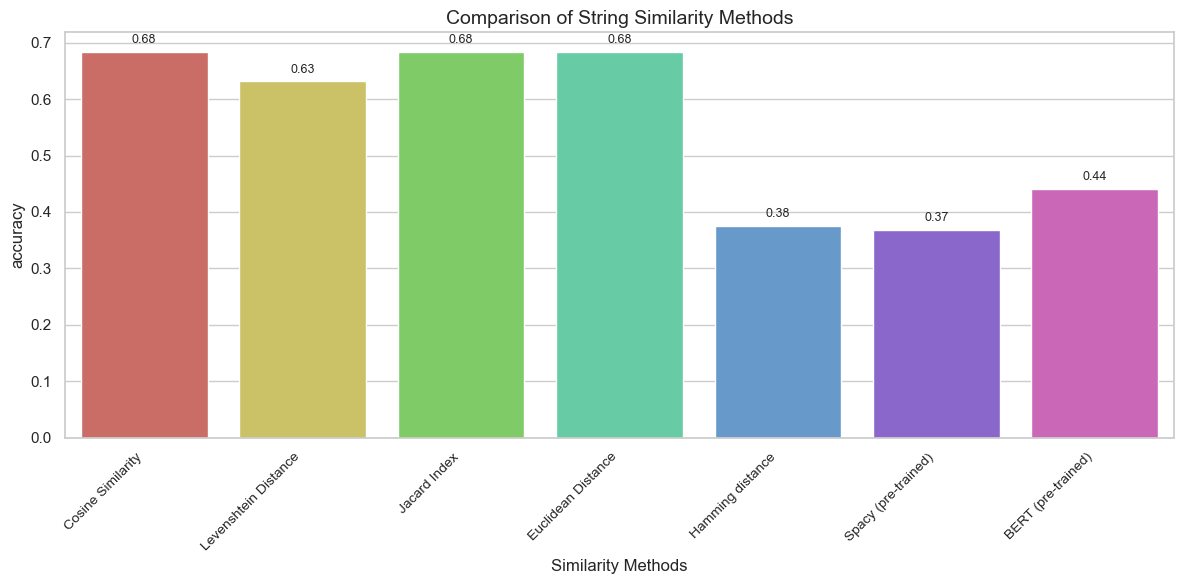

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# dict = {'Cosine Similarity': 0.675990675990676, 'Levenshtein Distance': 0.28205128205128205, 
#         'Jacard Index': 0.40326340326340326, 'Euclidean Distance': 0.7016317016317016, 
#         'Hamming Distance': 0.5, 'Spacy (pre-trained)': 0.668997668997669, 
#         'BERT (pre-trained)': 0.7530345471521942}

names = list(accuracy_dict.keys())
values = list(accuracy_dict.values())

# Seaborn styling
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=names, y=values, palette='hls')

plt.xlabel('Similarity Methods', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Comparison of String Similarity Methods', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) 

# Add annotations 
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# import plotly.graph_objects as go

# dict = {'cosine similarity': 0.675990675990676, 'levenstein': 0.28205128205128205, 
#         'jacard index': 0.40326340326340326, 'Euclidean Distance': 0.7016317016317016, 
#         'Hammin distance': 0.5, 'spacy(pre trained)': 0.668997668997669, 
#         'BERT(pre trained)': 0.7530345471521942}

# names = list(dict.keys())
# values = list(dict.values())

# fig = go.Figure(data=[go.Bar(x=names, y=values,
#             text=values,  # Add text annotations
#             textposition='outside', # Position the text outside the bars
#             marker_color='rgb(58, 140, 204)')]) # Set a custom color 

# fig.update_layout(
#     title='Comparison of String Similarity Methods',
#     xaxis_title='Similarity Methods',
#     yaxis_title='Similarity Score',
#     xaxis_tickangle=-45, 
#     # font=dict(family='Arial', size=12), 
#     yaxis_tickformat=".2f"  # Format y-axis labels to two decimal places
# )

# fig.show()

In [ ]:
accuracy_dict

{'Cosine Similarity': 0.6842105263157895,
 'Levenshtein Distance': 0.631578947368421,
 'Jacard Index': 0.6842105263157895,
 'Euclidean Distance': 0.6842105263157895,
 'Hamming distance': 0.375,
 'Spacy (pre-trained)': 0.3684210526315789,
 'BERT (pre-trained)': 0.44086021505376344}

In [ ]:
precision_dict

{'Cosine Similarity': 0.0,
 'Levenshtein Distance': 0.3333333333333333,
 'Jacard Index': 0.0,
 'Euclidean Distance': 0.0,
 'Hamming distance': 0.375,
 'Spacy (pre-trained)': 0.3333333333333333,
 'BERT (pre-trained)': 0.3333333333333333}